In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
df = pd.read_csv("winequality-red.csv", sep=";")

print("Dataset Loaded Successfully!")
df.head()

Dataset Loaded Successfully!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
X = df.drop("quality", axis=1)
y = df["quality"]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1599, 11)
Shape of y: (1599,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training and Testing sets ready.")

Training and Testing sets ready.


In [5]:
regressor = DecisionTreeRegressor(random_state=42)

regressor.fit(X_train, y_train)

print("Decision Tree Regressor trained successfully!")

Decision Tree Regressor trained successfully!


In [6]:
y_pred = regressor.predict(X_test)

y_pred[:10]# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# R-squared Score
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.60625
R-squared (R2): 0.07231130172297862


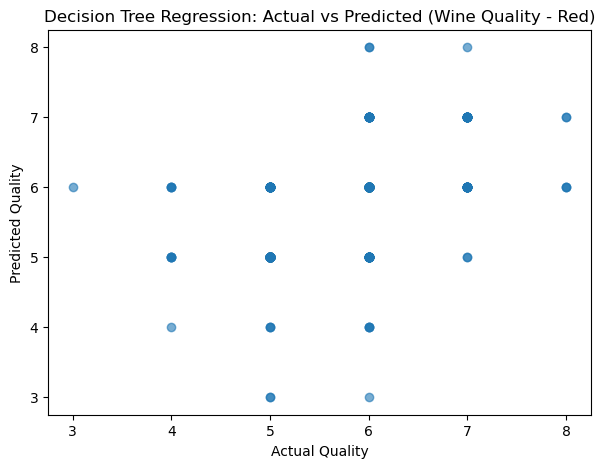

In [7]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Decision Tree Regression: Actual vs Predicted (Wine Quality - Red)")
plt.show()

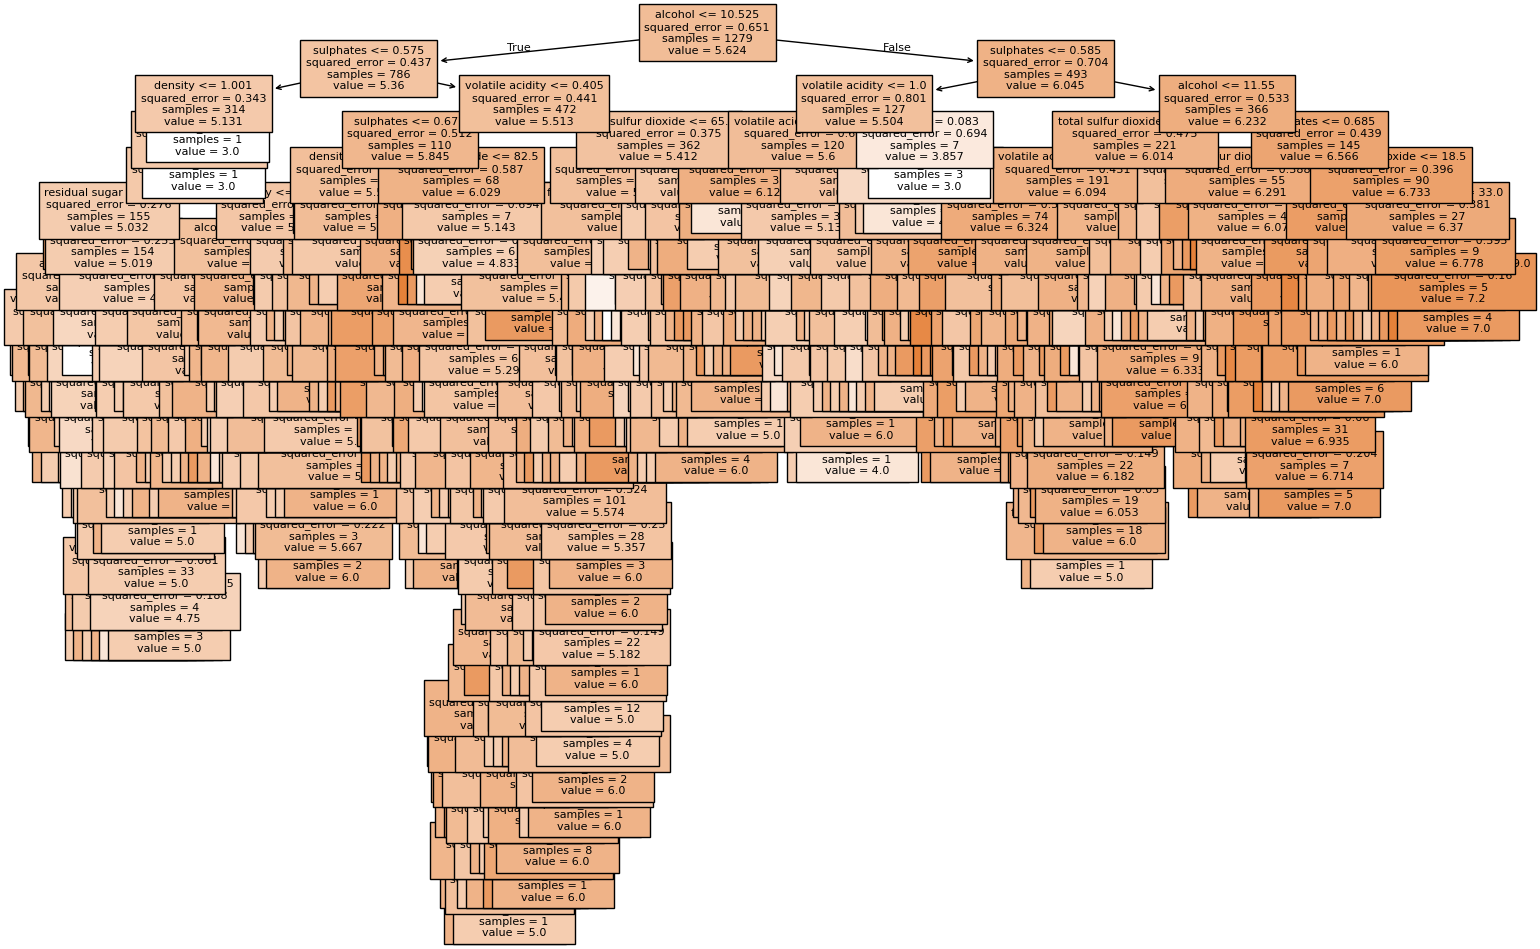

In [8]:
plt.figure(figsize=(18, 12))
tree.plot_tree(
    regressor,
    feature_names=X.columns,
    filled=True,
    fontsize=8
)
plt.show()